In [1]:
%matplotlib inline
import math
import time
from mxnet import np
from d2l import mxnet as d2l

In [2]:
n=10000
a=np.ones(n)
b=np.ones(n)

In [3]:
class Timer:  #@save
	"""Record multiple running times."""
	def __init__(self):
		self.times=[]
		self.start()
	def start(self):
		"""Start the timer."""
		self.tik=time.time()
	def stop(self):
		"""Stop the timer and record the time in a list."""
		self.times.append(time.time()-self.tik)
		return self.times[-1]
	def avg(self):
		"""Return the average time."""
		return sum(self.times)/len(self.times)
	def sum(self):
		"""Return the sum of time."""
		return sum(self.times)
	def cumsum(self):
		"""Return the accumulated time."""
		return np.array(self.times).cumsum().tolist()

In [4]:
c=np.zeros(n)
timer=Timer()
for i in range(n):
    c[i]=a[i]+b[i]
f'{timer.stop():.5f}sec'

'2.88926sec'

In [5]:
timer.start()
d=a+b
f'{timer.stop():.5f}sec'

'0.00031sec'

In [6]:
def normal(x, mu, sigma):
    p=1/math.sqrt(2*math.pi*sigma**2)
    return p*np.exp(-0.5/sigma**2*(x-mu)**2)

In [52]:
# Use numpy again for visualization
x=np.arange(-7,7,1)
# Mean and standard deviation pairs
params=[(0,1), (0,2), (3,1)]

In [53]:
x.shape,x,np.array(params).shape

((14,),
 array([-7., -6., -5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,
         6.]),
 (3, 2))

In [54]:
[normal(x, mu, sigma).asnumpy for mu, sigma in params]

[<bound method NDArray.asnumpy of array([9.1347208e-12, 6.0758829e-09, 1.4867196e-06, 1.3383022e-04,
        4.4318484e-03, 5.3990968e-02, 2.4197073e-01, 3.9894229e-01,
        2.4197073e-01, 5.3990968e-02, 4.4318484e-03, 1.3383022e-04,
        1.4867196e-06, 6.0758829e-09])>,
 <bound method NDArray.asnumpy of array([0.00043634, 0.00221592, 0.00876415, 0.02699548, 0.0647588 ,
        0.12098537, 0.17603266, 0.19947115, 0.17603266, 0.12098537,
        0.0647588 , 0.02699548, 0.00876415, 0.00221592])>,
 <bound method NDArray.asnumpy of array([7.6945991e-23, 1.0279774e-18, 5.0522712e-15, 9.1347208e-12,
        6.0758829e-09, 1.4867196e-06, 1.3383022e-04, 4.4318484e-03,
        5.3990968e-02, 2.4197073e-01, 3.9894229e-01, 2.4197073e-01,
        5.3990968e-02, 4.4318484e-03])>]

In [9]:
help(d2l.plot)

Help on function plot in module d2l.mxnet:

plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None, ylim=None, xscale='linear', yscale='linear', fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None)
    Plot data points.



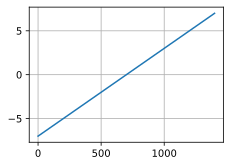

In [47]:
d2l.plot(x.asnumpy())

In [55]:
d2l.plot(x.asnumpy(), [normal(x, mu, sigma).asnumpy for mu, sigma in params],xlabel='x',ylabel='p(x)', figsize=(4.5,2.5))

ValueError: x and y must have same first dimension, but have shapes (14,) and (3,)

In [29]:

d2l.plot(x.asnumpy(), [normal(x, mu, sigma) for mu, sigma in params], xlabel='x',
    ylabel='p(x)', figsize=(4.5,2.5),
    legend=[f'mean{mu}, std{sigma}'for mu, sigma in params])

ValueError: setting an array element with a sequence. The requested array would exceed the maximum number of dimension of 32.